In [124]:

import pandas as pd
import sys
print("Python version:", sys.version)
print("pandas version:", pd.__version__)

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.0.3


In [125]:
import numpy as np # linear algebra 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels.api as sm
import matplotlib.pyplot as plt # data visualization
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore')
plt.style.use("ggplot")



In [126]:
# read the dataset from dir
import pandas as pd
df= pd.read_csv(r"-data.csv")
dt=pd.read_csv(r"test.csv")

In [127]:
# Load the data into a DataFrame
df= pd.read_csv(r"-data.csv")
# Get the number of rows and columns in the DataFrame
num_rows = df.shape[0]
num_cols = df.shape[1]

In [128]:
# Print the number of rows and columns
print(f"Le DataFrame 'data' contient {num_rows} lignes et {num_cols} colonnes.")
print("Nombre de lignes :",num_rows)
print("Nombre de colonnes :",num_cols )

Le DataFrame 'data' contient 268 lignes et 73 colonnes.
Nombre de lignes : 268
Nombre de colonnes : 73


In [129]:
print("train dataset is ",df)
print("test dataset is ",dt)

train dataset is       diagnosis  W_mean_ADC    median  W_ standard deviation   W_variation  \
0            1    1.727845  1.677751               0.630697      0.000398   
1            1    1.441333  1.409257               0.244620      0.000060   
2            1    1.205960  1.167455               0.279817      0.000078   
3            1    1.138989  1.128556               0.296992      0.000088   
4            1    1.065516  1.065481               0.265030      0.000070   
..         ...         ...       ...                    ...           ...   
263          0    3.188241  3.196193               0.293825      0.000086   
264          0    3.441219  3.396614               0.243109      0.000059   
265          0    3.177649  3.189224               0.280287      0.000079   
266          0    2.121241  2.093735               0.272254      0.000074   
267          0    1.915574  1.974569               0.262075      0.000069   

     W_ kurtosis   W_skewness   W_percentiles-5  W_percen

In [130]:
print(df.isnull().sum())  # Display the number of missing values per column

diagnosis                0
W_mean_ADC               0
 median                  0
W_ standard deviation    0
 W_variation             0
                        ..
Shap6                    0
Shap7                    0
Shap8                    0
Shap9                    0
Shap10                   0
Length: 73, dtype: int64


In [131]:
# view dimensions of dataset
print(df.shape) 
print(dt.shape)

(268, 73)
(67, 73)


In [132]:
# preview the dataset
print(df.head())
print(dt.head())

   diagnosis  W_mean_ADC    median  W_ standard deviation   W_variation  \
0          1    1.727845  1.677751               0.630697      0.000398   
1          1    1.441333  1.409257               0.244620      0.000060   
2          1    1.205960  1.167455               0.279817      0.000078   
3          1    1.138989  1.128556               0.296992      0.000088   
4          1    1.065516  1.065481               0.265030      0.000070   

   W_ kurtosis   W_skewness   W_percentiles-5  W_percentiles-10  \
0   2164.978807    82.362030         0.716287          0.883099   
1   3156.261206   736.330104         1.121229          1.149717   
2   3739.253388   593.537889         0.733597          0.870805   
3   2925.554626   418.079256         0.675775          0.739395   
4   2477.244490   119.235044         0.632906          0.688313   

   W_percentiles-25   ...  Shap1      Shap2      Shap3     Shap4      Shap5  \
0           1.304599  ...    126  13.795400  11.733536  0.525911  7

In [133]:
#View summary of dataset
df.info()
dt.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 73 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                268 non-null    int64  
 1   W_mean_ADC               268 non-null    float64
 2    median                  268 non-null    float64
 3   W_ standard deviation    268 non-null    float64
 4    W_variation             268 non-null    float64
 5   W_ kurtosis              268 non-null    float64
 6   W_skewness               268 non-null    float64
 7   W_percentiles-5          268 non-null    float64
 8   W_percentiles-10         268 non-null    float64
 9   W_percentiles-25         268 non-null    float64
 10  W_percentiles-50         268 non-null    float64
 11  W_percentiles-75         268 non-null    float64
 12  W_percentiles-90         268 non-null    float64
 13  S_ADC_mean               268 non-null    float64
 14  S_ADC_median             2

<bound method DataFrame.info of     diagnosis  W_mean_ADC    median  W_ standard deviation   W_variation  \
0           1    1.227046  1.181913               0.453896      0.000206   
1           1    1.309365  1.281432               0.368838      0.000136   
2           1    1.249682  1.163506               0.305708      0.000093   
3           1    1.055928  1.031732               0.325501      0.000106   
4           1    1.339811  1.329445               0.547931      0.000300   
..        ...         ...       ...                    ...           ...   
62          0    3.080510  3.135504               0.262862      0.000069   
63          0    2.040189  2.042679               0.196858      0.000039   
64          0    1.854495  1.904025               0.301240      0.000091   
65          0    1.980454  1.952073               0.408092      0.000167   
66          0    1.774274  1.903068               0.378435      0.000143   

    W_ kurtosis   W_skewness   W_percentiles-5  W_perce

In [134]:
df.describe()
dt.describe()

,diagnosis,W_mean_ADC,median,W_ standard deviation,W_variation,W_ kurtosis,W_skewness,W_percentiles-5,W_percentiles-10,W_percentiles-25,...,Shap1,Shap2,Shap3,Shap4,Shap5,Shap6,Shap7,Shap8,Shap9,Shap10
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.820896,1.353885,1.308166,0.374042,0.000155,4084.422825,546.366654,0.814848,0.925190,1.103198,...,434.119403,26.636327,16.499135,0.737901,-6.215364,20.401401,0.936850,0.669406,69.917224,1.662558
std,0.386334,0.483399,0.512363,0.124391,0.000099,2517.973771,801.869661,0.465966,0.478643,0.501161,...,691.715117,16.094924,9.847426,0.148188,58.958390,11.772396,0.024170,0.065461,45.528132,0.464555
min,0.000000,0.726499,0.651392,0.126546,0.000016,2083.530932,-2654.127549,0.038153,0.171304,0.329922,...,70.000000,10.091654,7.133415,0.154649,-89.512236,9.440697,0.879195,0.452128,28.582000,1.012177
25%,1.000000,1.052980,0.979099,0.289779,0.000084,2915.963417,211.613941,0.549125,0.659423,0.816679,...,138.000000,17.495956,10.251486,0.669359,-64.078026,13.255454,0.921597,0.639398,43.456000,1.346304
50%,1.000000,1.232351,1.181913,0.349317,0.000122,3379.289489,684.312262,0.753309,0.837505,1.004144,...,221.000000,22.347124,13.289556,0.754573,-16.175159,16.774562,0.942222,0.673016,55.932000,1.523888
75%,1.000000,1.550842,1.500594,0.456658,0.000209,4452.873826,937.178242,1.017582,1.117597,1.256018,...,441.500000,30.056863,18.615496,0.841431,49.287968,23.707381,0.956041,0.711050,81.057000,1.850621
max,1.000000,3.296377,3.396463,0.711656,0.000506,20605.481297,3518.092129,2.468238,2.793109,3.063799,...,4366.000000,88.478085,63.483035,0.952438,87.238084,74.558459,0.976526,0.775401,273.314000,3.281576


In [135]:
for var in df.columns:
    
    print(df["diagnosis"].value_counts())

diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47
Name: count, dtype: int64
diagnosis
1    221
0     47


In [136]:
# Split the data into features (X) and target variable (y)
# Declare feature vector and target variable
X_train = df.drop("diagnosis", axis=1)  # choose diagnosis as the target column
y_train = df["diagnosis"]
X_test = dt.drop("diagnosis", axis=1)
y_test = dt["diagnosis"]

In [137]:
print (len(X_train))
print (len(y_train))
print (len(X_test))
print(len(y_test))

268
268
67
67


In [138]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=99, stratify=y_train)
# Now you can use X_train, X_test, y_train, and y_test for training and testing your machine learning model

In [139]:
X_train.dtypes

W_mean_ADC               float64
 median                  float64
W_ standard deviation    float64
 W_variation             float64
W_ kurtosis              float64
                          ...   
Shap6                    float64
Shap7                    float64
Shap8                    float64
Shap9                    float64
Shap10                   float64
Length: 72, dtype: object

In [140]:
X_train.head()

,W_mean_ADC,median,W_ standard deviation,W_variation,W_ kurtosis,W_skewness,W_percentiles-5,W_percentiles-10,W_percentiles-25,W_percentiles-50,...,Shap1,Shap2,Shap3,Shap4,Shap5,Shap6,Shap7,Shap8,Shap9,Shap10
117,1.308816,1.240117,0.239795,0.000058,3708.525008,1104.484710,1.033850,1.067257,1.134281,1.240117,...,250,23.871115,13.764601,0.817011,63.182533,17.841241,0.925926,0.631313,58.925,1.734240
228,1.804363,1.655420,0.514773,0.000265,3024.721293,912.783396,1.193648,1.251386,1.417348,1.655420,...,377,23.755859,22.394812,0.333622,-15.251479,21.909160,0.912833,0.628333,75.689,1.060775
182,1.330144,1.280452,0.335565,0.000113,3289.782903,634.368334,0.861807,0.952711,1.082995,1.280452,...,130,16.183380,10.419276,0.765172,66.100282,12.865502,0.970149,0.677083,39.532,1.553215
196,0.790004,0.743177,0.241498,0.000058,3563.137916,788.753943,0.475606,0.532381,0.620332,0.743177,...,657,38.630101,22.545999,0.812014,-23.850350,28.922627,0.952174,0.612302,98.416,1.713391
97,1.152437,1.176210,0.463731,0.000215,2200.046472,90.438659,0.424327,0.511049,0.766600,1.176210,...,103,13.007643,10.256604,0.615027,-57.987259,11.451798,0.953704,0.660256,35.430,1.268221


In [141]:
# Choose a classification model(Random forest here)
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier() 


In [142]:
# Train the model on the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [143]:
rfc = RandomForestClassifier(random_state=0)

In [144]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [145]:
# fit the model

rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [146]:
# Predict the Test set results
y_pred = rfc.predict(X_test)

In [147]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'.format(accuracy))
# Calculate error rate (1 - accuracy)
error_rate = 1 - accuracy
print('Error rate ():', error_rate * 100, '%')
print('Error rate (percentage):', error_rate * 100, '%')

Model accuracy score with 10 decision-trees : 0.9074
Error rate (): 9.259259259259256 %
Error rate (percentage): 9.259259259259256 %


In [148]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [149]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

W_mean_ADC           0.080576
W_percentiles-25     0.080362
 median              0.077629
NS_ADC_median        0.068757
W_percentiles-75     0.059214
                       ...   
Feat32               0.002587
Shap5                0.002368
 S_ ADC_maximum      0.002008
 NS_ ADC_minimum     0.001730
Feat4                0.001573
Length: 72, dtype: float64

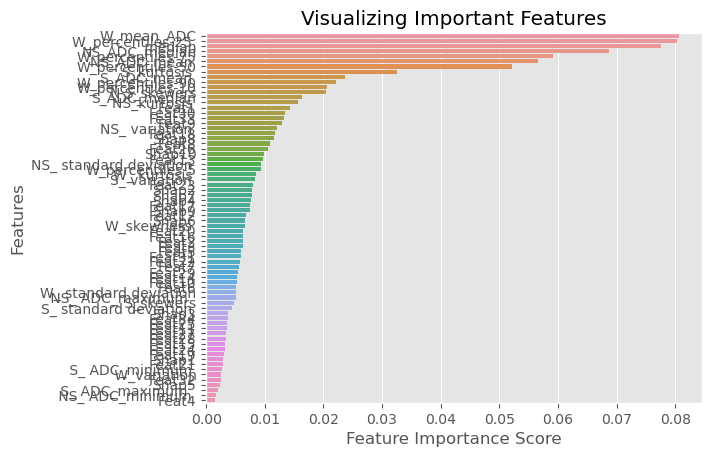

In [150]:
# Import seaborn library
import seaborn as sns
import matplotlib.pyplot as plt # data visualization 
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [151]:
# instantiate the classifier with n_estimators = 100
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred_100) * 100
precision = precision_score(y_test, y_pred_100)*100
recall = recall_score(y_test, y_pred_100)*100
f1 = f1_score(y_test, y_pred_100)*100
print("Accuracy of Random Forest classifier:", f"{accuracy:.2f}%")
print('Model accuracy score with 100 decision-trees:', f"{accuracy_score(y_test, y_pred_100):.4f}")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy of Random Forest classifier: 90.74%
Model accuracy score with 100 decision-trees: 0.9074
Precision: 97.61904761904762
Recall: 91.11111111111111
F1-score: 94.25287356321839


In [152]:
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score  
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))


Model accuracy score with 100 decision-trees : 0.9074


In [153]:
from sklearn.metrics import classification_report 
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.98      0.91      0.94        45

    accuracy                           0.91        54
   macro avg       0.82      0.90      0.85        54
weighted avg       0.92      0.91      0.91        54



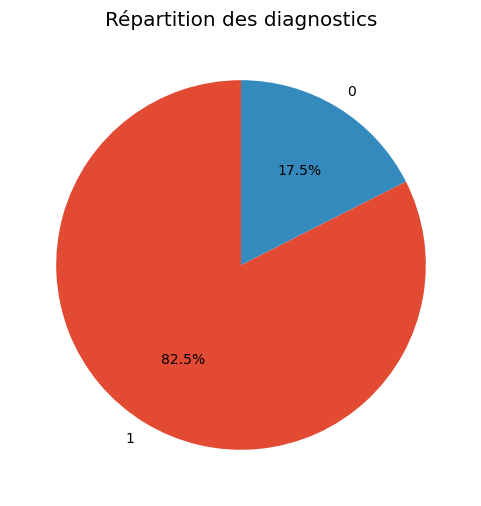

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df= pd.read_csv(r"-data.csv")
# Créer un diagramme circulaire pour montrer la répartition des valeurs dans la colonne 'diagnosis'
plt.figure(figsize=(6, 6))
plt.pie(df['diagnosis'].value_counts(), labels=['1', '0'], autopct='%1.1f%%', startangle=90)
plt.title('Répartition des diagnostics')
plt.show()


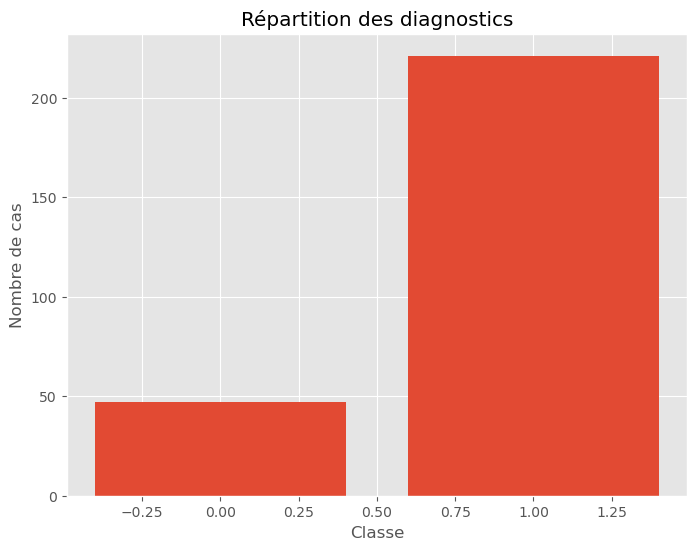

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df= pd.read_csv(r"-data.csv")

# Compter les occurrences de chaque classe
class_counts = df['diagnosis'].value_counts().sort_index()

# Créer une figure
plt.figure(figsize=(8, 6))

# Créer un graphique en barres
plt.bar(class_counts.index, class_counts.values)

# Ajouter des étiquettes et un titre
plt.xlabel('Classe')
plt.ylabel('Nombre de cas')
plt.title('Répartition des diagnostics')

# Afficher le graphique
plt.show()



In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,y_pred)

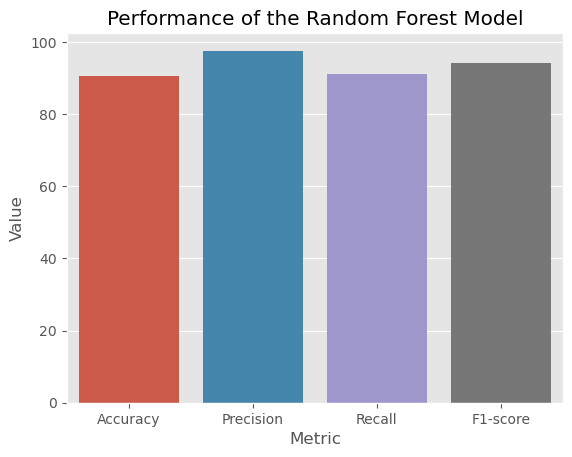

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have calculated accuracy, precision, recall, and f1

metrics = ["Accuracy", "Precision", "Recall", "F1-score"]  # Use descriptive labels
values = [accuracy, precision, recall, f1]
sns.barplot(x=metrics, y=values)  # Pass lists directly to x and y
plt.xlabel("Metric")  # Corrected spelling
plt.ylabel("Value")
plt.title("Performance of the Random Forest Model")
plt.show()




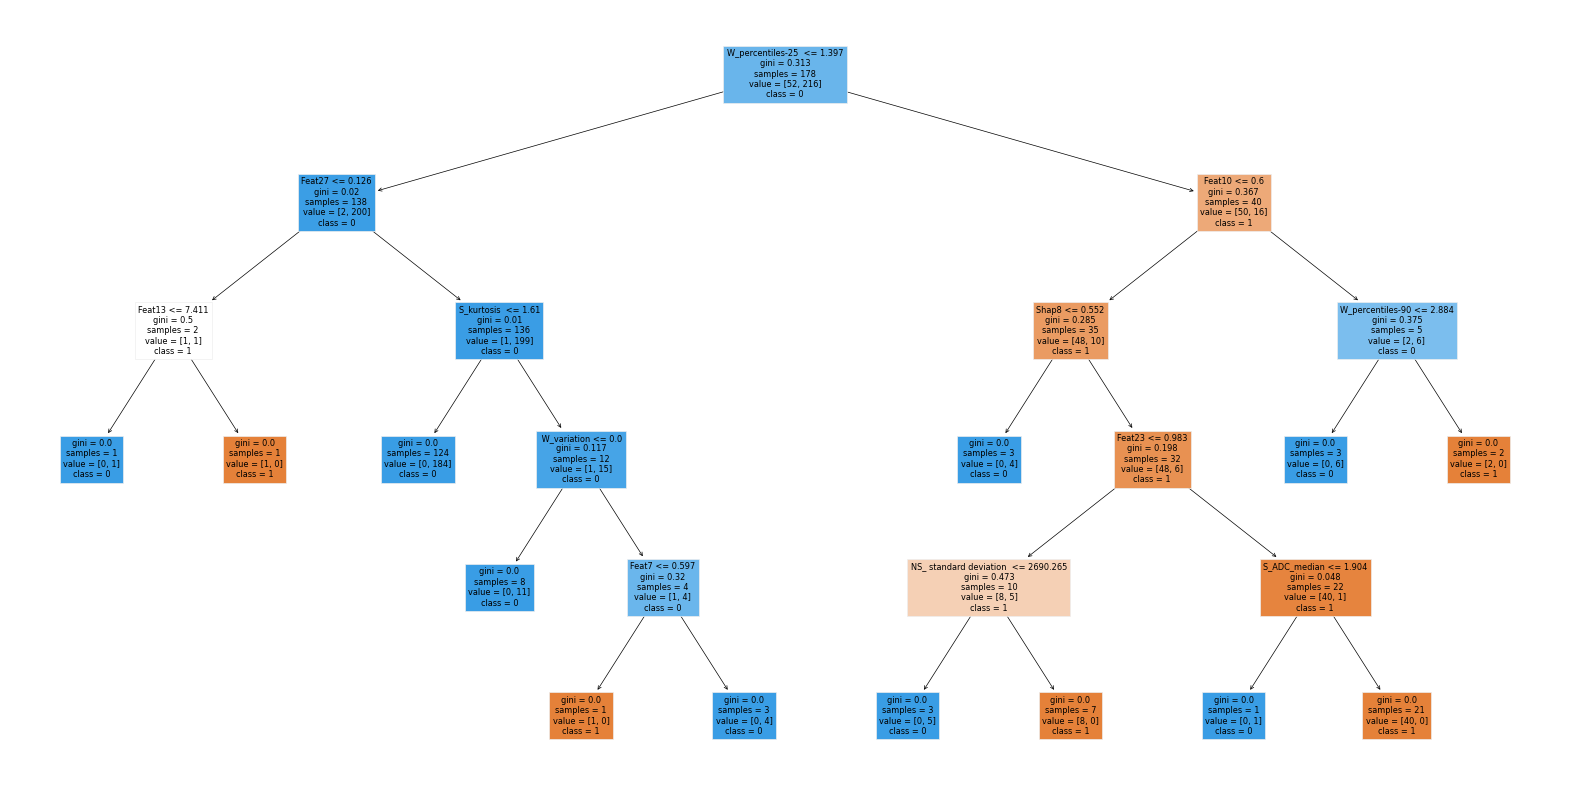

In [158]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("-data.csv")
dt = pd.read_csv("test.csv")

# Split the data into features (X) and target variable (y)
X_train = df.drop("diagnosis", axis=1)
y_train = df["diagnosis"]
X_test = dt.drop("diagnosis", axis=1)
y_test = dt["diagnosis"]

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=99)  # Adjust parameters as needed
rf_model.fit(X_train, y_train)

# Extract one of the decision trees from the Random Forest
tree_to_visualize = rf_model.estimators_[0]  # Extracting the first tree, you can choose any index

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_to_visualize, feature_names=list(X_train.columns), class_names=y_train.unique().astype(str).tolist(), filled=True)
plt.show()


In [166]:
# Load the data into a DataFrame

df["diagnosis"].value_counts()

diagnosis
1    221
0     47
Name: count, dtype: int64

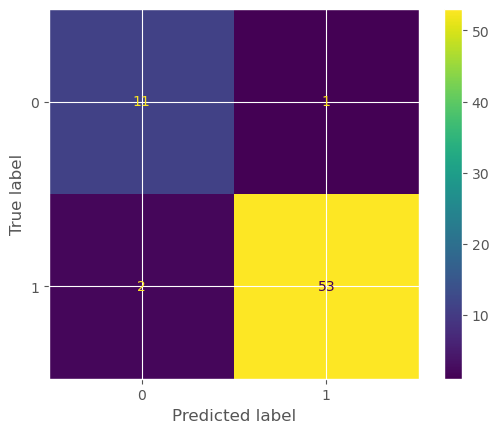

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Supposons que vous avez déjà préparé vos données d'entraînement et de test
# X_train, X_test, y_train, y_test
df = pd.read_csv("-data.csv")
dt = pd.read_csv("test.csv")
# Créez le modèle de base
model = RandomForestClassifier()

# Définissez les paramètres pour la recherche aléatoire
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    # Ajoutez d'autres paramètres si nécessaire
}

# Instanciez et exécutez la recherche aléatoire
best_rf = RandomizedSearchCV(model, param_distributions, cv=5, n_iter=10, random_state=42)
best_rf.fit(X_train, y_train)

# Maintenant, vous pouvez utiliser best_rf pour faire des prédictions
y_pred = best_rf.predict(X_test)

# Et créer la matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()


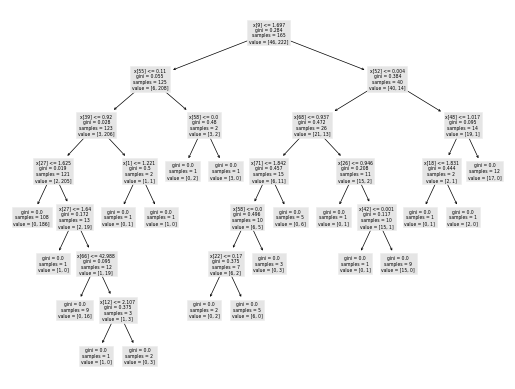

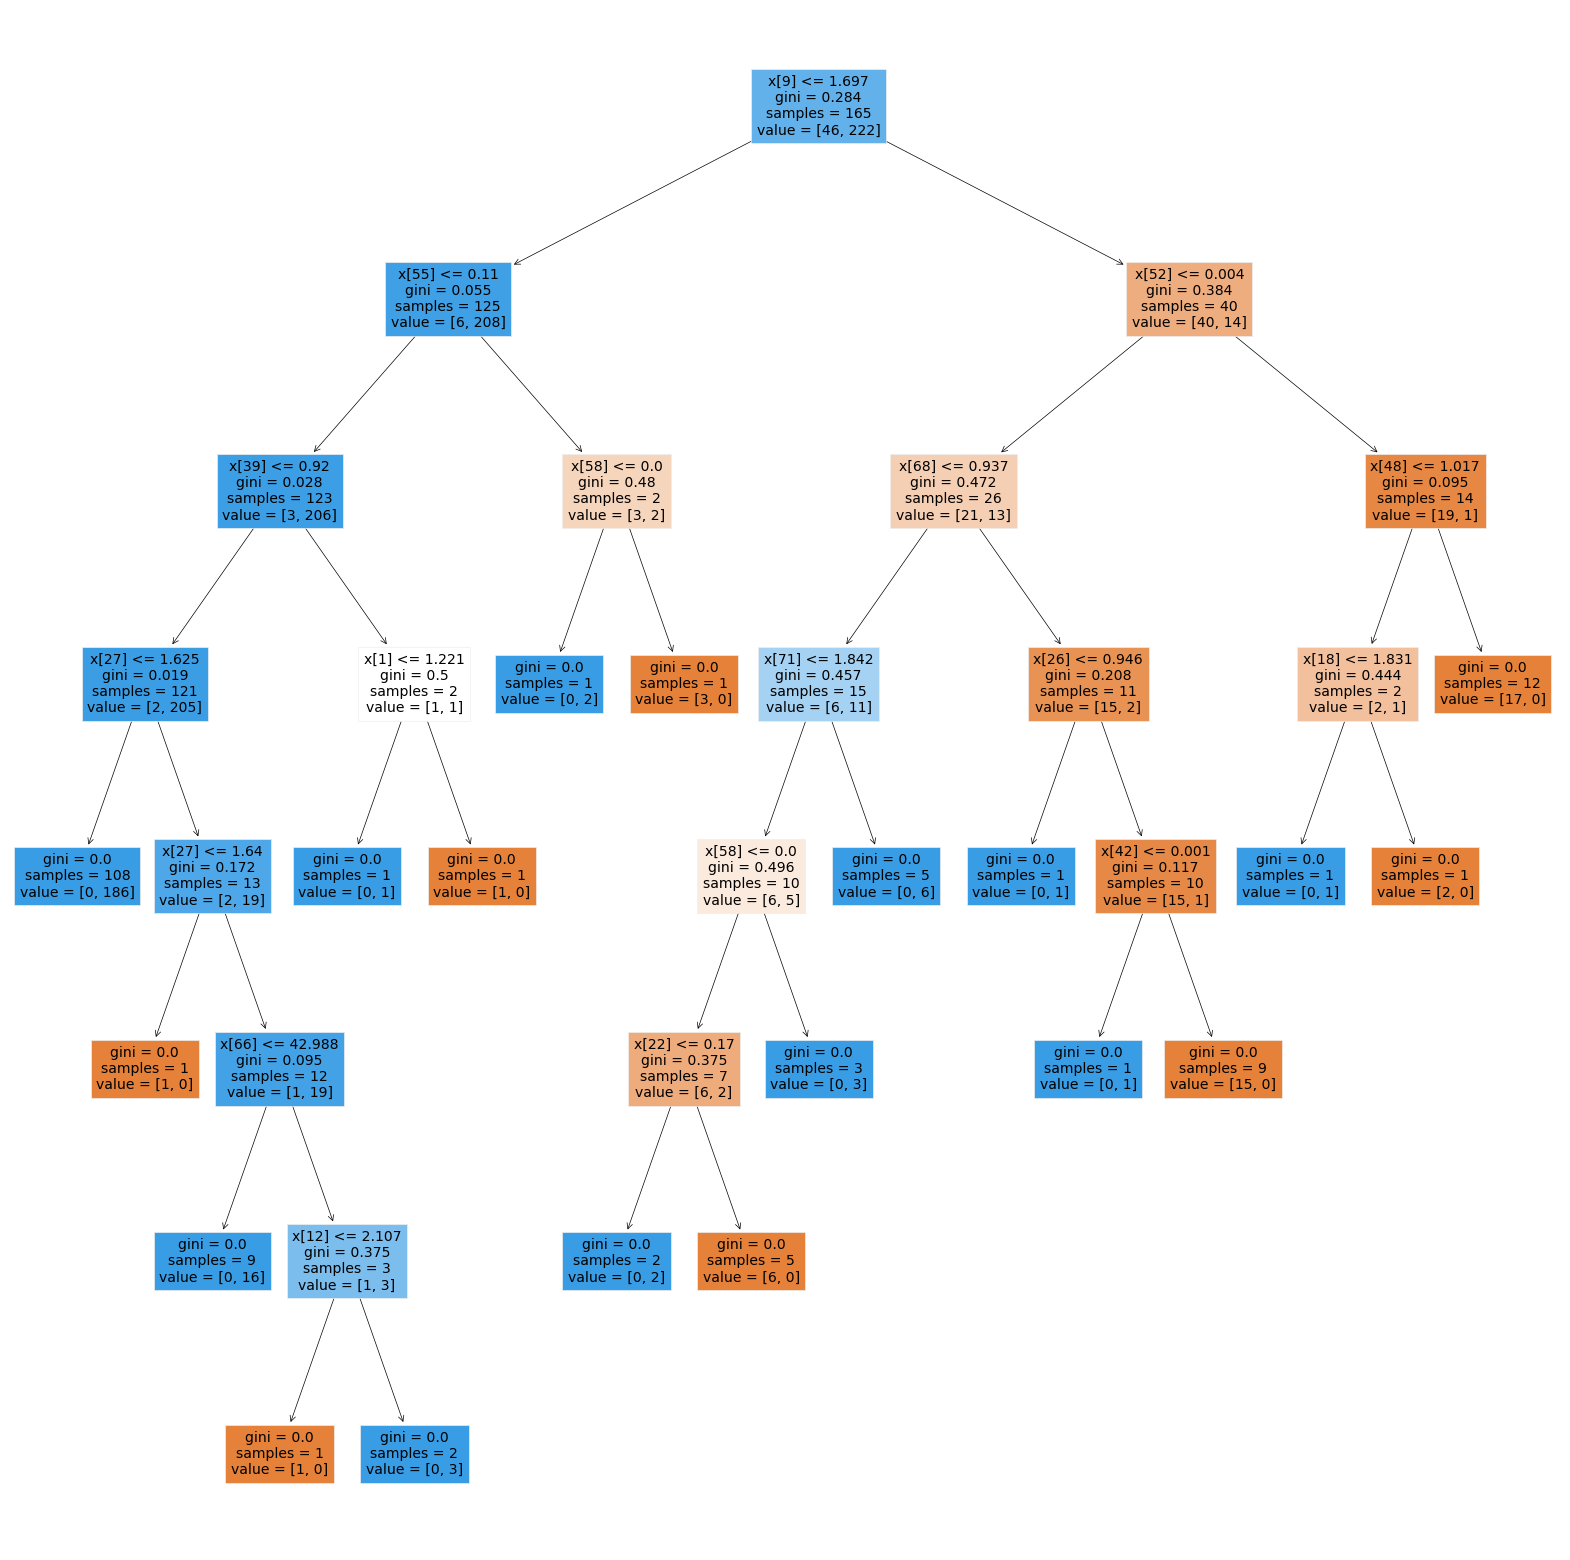

W_mean_ADC: 0.0442694868105509
 median: 0.049681190333906375
W_ standard deviation: 0.003955221838654533
 W_variation: 0.003514877508706487
W_ kurtosis : 0.0074850544524401146
W_skewness : 0.012901332576191058
W_percentiles-5: 0.02297749281033584
W_percentiles-10: 0.025363798163250087
W_percentiles-25 : 0.07138775149571884
W_percentiles-50: 0.08738237277630673
W_percentiles-75: 0.03593741375916672
W_percentiles-90: 0.024273115903285104
S_ADC_mean : 0.01431929806672119
S_ADC_median: 0.02385634966641905
 S_ ADC_minimum : 0.006166219741988516
 S_ ADC_maximum  : 0.006069724239215466
S_ standard deviation : 0.006097390021565606
S_ variation : 0.008512790440696548
S_kurtosis : 0.03676111376135037
 S_skewers: 0.011350045969139971
NS_ADC_mean : 0.06822297880989522
NS_ADC_median: 0.058060664503472116
 NS_ ADC_minimum : 0.008485985416603205
 NS_ ADC_maximum  : 0.005525974738974228
NS_ standard deviation : 0.009544103571115316
NS_ variation : 0.009100284028876386
NS_kurtosis : 0.01856255888918857

In [168]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

# Load the data into a DataFrame
df = pd.read_csv("-data.csv")

# Entraîner un classifieur Random Forest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Visualiser un arbre de décision individuel
plot_tree(clf.estimators_[0])
plt.show()
tree = clf.estimators_[0]
# Visualiser un arbre de décision individuel
plt.figure(figsize=(20, 20))  # Ajuster la taille de la figure
plot_tree(clf.estimators_[0], filled=True)
plt.show()


importances = clf.feature_importances_
labels = X_train.columns
for i, label in enumerate(labels):
    print(f"{label}: {importances[i]}")


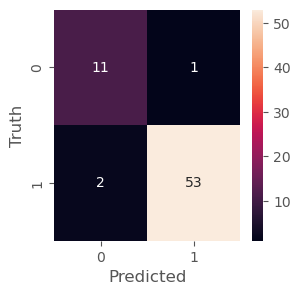

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

# Load the data into a DataFrame
df = pd.read_csv("-data.csv")# Print the number of features and classes

plt.figure(figsize=(3, 3))  # Utilisation de (3, 3) pour définir la taille de la figure
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
